In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from statistics import correlation


In [54]:
NSE=pd.read_csv('~\Downloads\^NSEI (3).csv')
NSE

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
3310,2023-05-23,18362.900391,18419.750000,18324.199219,18348.000000,18348.000000,270400.0
3311,2023-05-24,18294.800781,18392.599609,18262.949219,18285.400391,18285.400391,232600.0
3312,2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900.0
3313,2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700.0


In [55]:
NASDAQ=pd.read_csv('~\Downloads\^IXIC (3).csv')
NASDAQ

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...,...
3368,2023-05-22,12664.440430,12756.230469,12655.259766,12720.780273,12720.780273,4278920000
3369,2023-05-23,12652.879883,12709.740234,12554.429688,12560.250000,12560.250000,4347440000
3370,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000
3371,2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000


In [57]:
NSE_m=pd.DataFrame(columns=['Date','Open','High','Low','Close','Adj Close','Volume'])
NASDAQ_m=pd.DataFrame(columns=['Date','Open','High','Low','Close','Adj Close','Volume'])
count=0
for i in range(len(NSE.Date)):
    for j in range(len(NASDAQ.Date)):
        if(NASDAQ.Date[j]==NSE.Date[i]):
            NSE_m.loc[count]=NSE.loc[i]
            NASDAQ_m.loc[count]=NASDAQ.loc[j]
            count=count+1
            break
NSE_m
         

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.75,5263.100098,5263.100098,0.0
4,2010-01-08,5264.25,5276.75,5234.700195,5244.75,5244.75,0.0
...,...,...,...,...,...,...,...
3204,2023-05-22,18201.099609,18335.25,18178.849609,18314.400391,18314.400391,262600.0
3205,2023-05-23,18362.900391,18419.75,18324.199219,18348.0,18348.0,270400.0
3206,2023-05-24,18294.800781,18392.599609,18262.949219,18285.400391,18285.400391,232600.0
3207,2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900.0


In [58]:
r1=NSE_m.Close.astype(float)
r2=NASDAQ_m.Close.astype(float)
r2

0        2308.419922
1        2308.709961
2        2301.090088
3        2300.050049
4        2317.169922
            ...     
3204    12720.780273
3205    12560.250000
3206    12484.160156
3207    12698.089844
3208    12975.690430
Name: Close, Length: 3209, dtype: float64

In [59]:
x=r1.corr(r2)
x
# correlation between NSE.Close and NASDAQ.close

0.9511335699484637

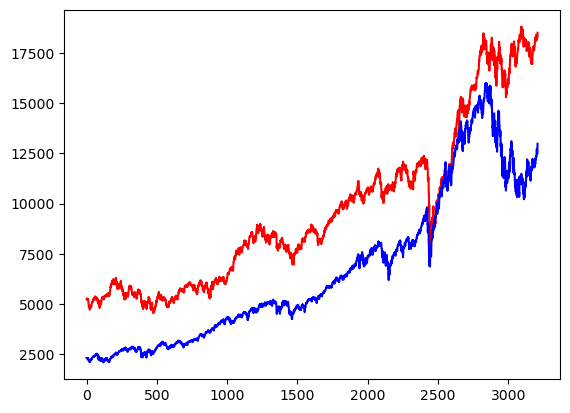

In [60]:
plt.plot(r1,color='r')#NSE
plt.plot(r2,color='b')#NASDAQ

In [8]:
#Lead-Lag Relationship:
#a) Identify potential lead-lag relationships between the indices.
#b) Analyze data to determine consistent leading or lagging behavior.
#c) Use the lead-lag relationship to determine the index to be used for parameter optimization.
#d) Provide an explanation for choosing the index for parameter optimization

In [61]:
#LETS FIRST ASSUME NSE LEADS AND NASDAQ LAGS
position=0
corr=[]
for i in range(21):
    sample=(r1.head(3210-i)).corr(r2.tail(3210-i))
    corr.append(sample)
corr
#Therefore here NSE AND NASDAQ has best correlation when data is considered from starting

[0.9511335699484637,
 0.9511335699484637,
 0.9510999015312942,
 0.9510749459250518,
 0.9510604973974786,
 0.9510441088312543,
 0.9510176088230965,
 0.9509906065654314,
 0.9509592537939197,
 0.9509398272629566,
 0.9509340526512915,
 0.9509319332368961,
 0.9509310488252692,
 0.9509267692844451,
 0.9509238380498855,
 0.950926368444518,
 0.9509239239565629,
 0.9509137811208435,
 0.9509296705280575,
 0.9509335708729728,
 0.9509370313047344]

In [62]:
#NOW ASSUMED THE OPPOSITE
position=0
corr2=[]
for i in range(21):
    sample=(r2.head(3210-i)).corr(r1.tail(3210-i))
    corr2.append(sample)
corr2
#BUT THIS ALSO GIVES the same result that lead/lag=0

[0.9511335699484635,
 0.9511335699484635,
 0.9510999015312943,
 0.9510749459250518,
 0.9510604973974787,
 0.9510441088312546,
 0.9510176088230965,
 0.9509906065654314,
 0.9509592537939198,
 0.9509398272629566,
 0.9509340526512915,
 0.950931933236896,
 0.9509310488252691,
 0.9509267692844451,
 0.9509238380498853,
 0.950926368444518,
 0.9509239239565627,
 0.9509137811208436,
 0.9509296705280574,
 0.9509335708729728,
 0.9509370313047344]

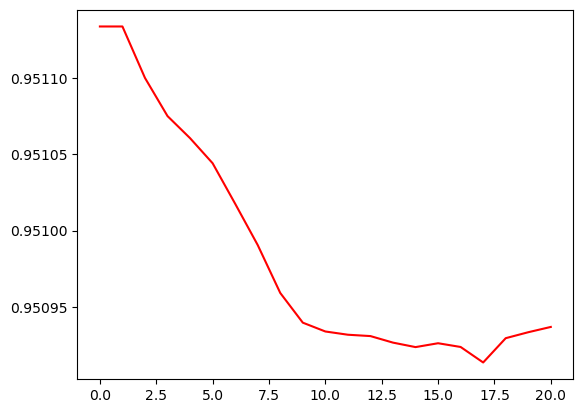

In [63]:
plt.plot(corr,color='r') #Just graphs for reference

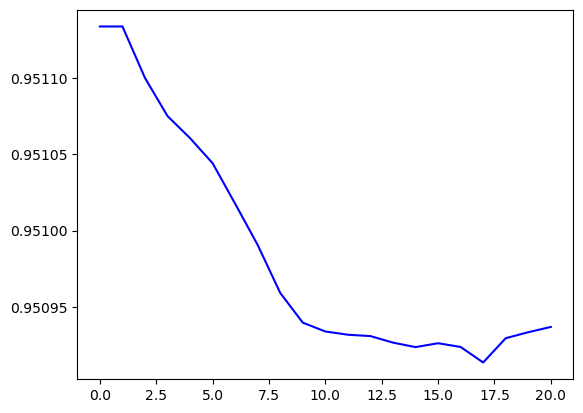

In [64]:
plt.plot(corr2,color='b')

In [65]:
#For ema, what I require is EMA = Closing price x multiplier + EMA (previous day) x (1-multiplier)
# and multiplier is 2/(days+1)
#EMA
def EMA(index,days):
    index['EMA']=''
    SMA=0
    multiplier=(2)/(days+1)
    for i in range(days):
        SMA+=index.Close[i]
    SMA=(SMA)/(days)
    index['EMA'][days-1]=SMA
    for i in range(days,len(index.Close)):
        index['EMA'][i]=((index.Close[i])*multiplier)+((index['EMA'][i-1])*(1-multiplier))
    return index

In [14]:
#Indicator Coding:
#a) Code Keltner Channel, Bollinger Bands, and MACD indicators.

In [66]:
#MACD indicators:
# 12 day EMA,26 day EMA, diff is MACD line. Also plot a 9 day EMA of MACD line.
NASDAQ=EMA(NASDAQ,12)
NASDAQ.rename(columns={'EMA':'EMA_12'},inplace=True)
NASDAQ=EMA(NASDAQ,26)
NASDAQ.rename(columns={'EMA':'EMA_26'},inplace=True)
NASDAQ['MACD']=''
for i in range(25,len(NASDAQ.Close)):
    NASDAQ['MACD'][i]=NASDAQ['EMA_12'][i]-NASDAQ['EMA_26'][i]
NASDAQ['MACD_EMA_9']=''
SMA=0
multiplier=(0.2)
for i in range(25,34):
    SMA+=NASDAQ['MACD'][i]
SMA=(SMA)/9
NASDAQ['MACD_EMA_9'][33]=SMA
for i in range(34,len(NASDAQ.Close)):
    NASDAQ['MACD_EMA_9'][i]=((NASDAQ['MACD'][i])*multiplier)+((NASDAQ['MACD_EMA_9'][i-1])*(1-multiplier))
NASDAQ

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\731745213.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index['EMA'][days-1]=SMA
C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\731745213.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index['EMA'][i]=((index.Close[i])*multiplier)+((index['EMA'][i-1])*(1-multiplier))
C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\731745213.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,MACD_EMA_9
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,,,,
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,,,,
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,,,,
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,,,,
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,,,,
...,...,...,...,...,...,...,...,...,...,...,...
3368,2023-05-22,12664.440430,12756.230469,12655.259766,12720.780273,12720.780273,4278920000,12441.303588,12273.174795,168.128793,122.710253
3369,2023-05-23,12652.879883,12709.740234,12554.429688,12560.250000,12560.250000,4347440000,12459.603036,12294.439625,165.163411,131.200884
3370,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,12463.381054,12308.492998,154.888057,135.938319
3371,2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12499.490099,12337.352023,162.138076,141.17827


Text(0.5, 1.0, 'MACD')

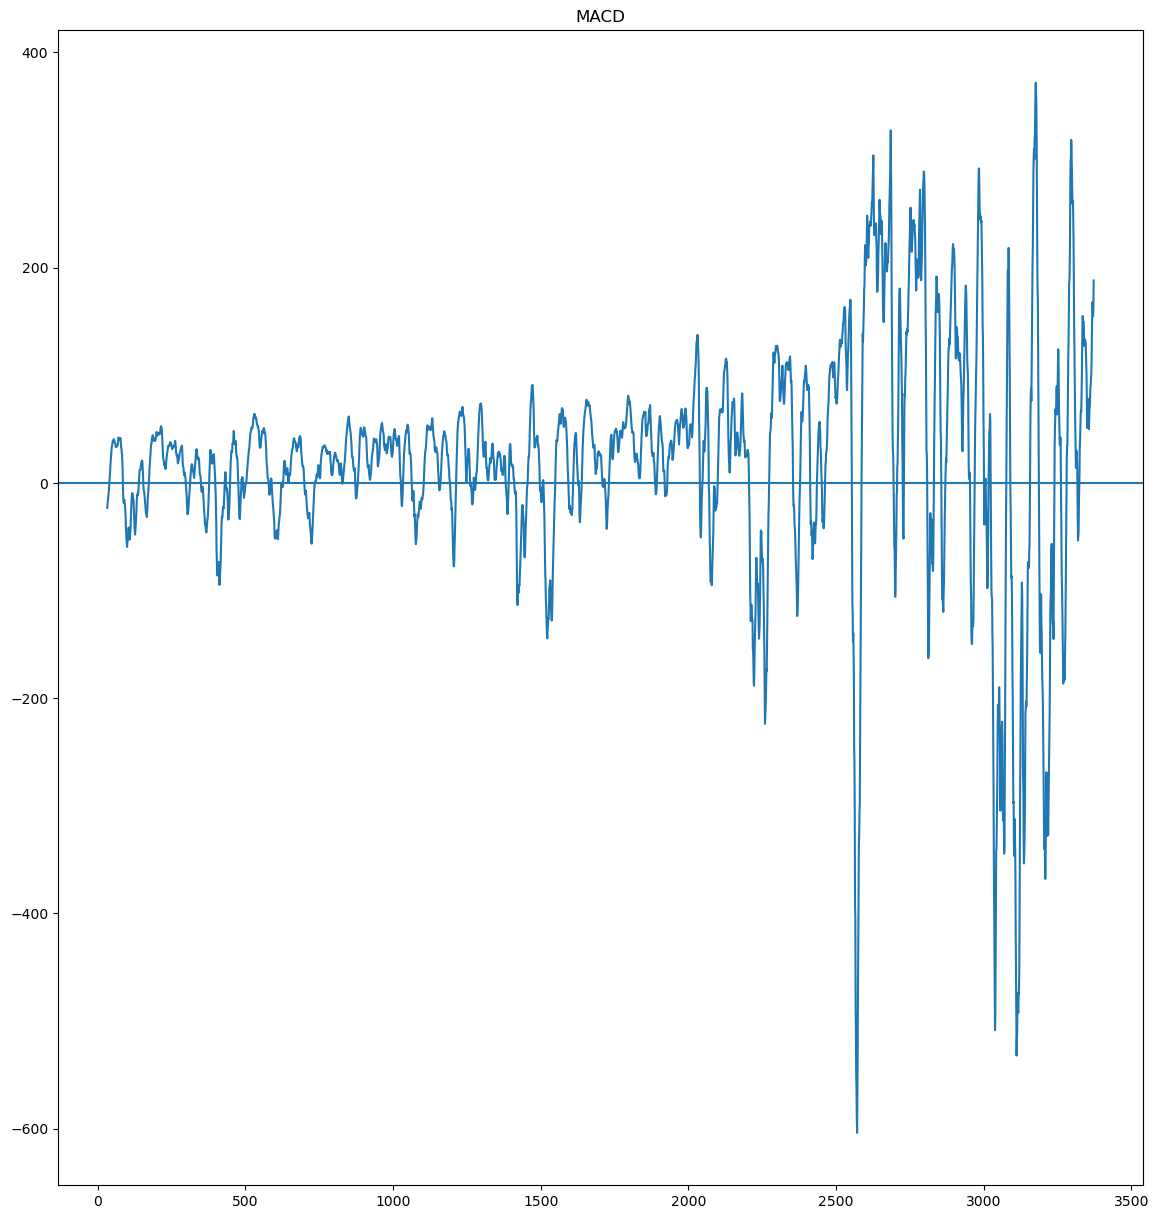

In [70]:
r1=NASDAQ['MACD'].tail(3341)
r2=NASDAQ['MACD_EMA_9'].tail(3341)
r3=NASDAQ.Close.tail(3341)
r4=NASDAQ.Open.tail(3341)
plt.figure(figsize=(14,15))
plt.plot(r1)
plt.axhline(0)
plt.title('MACD')

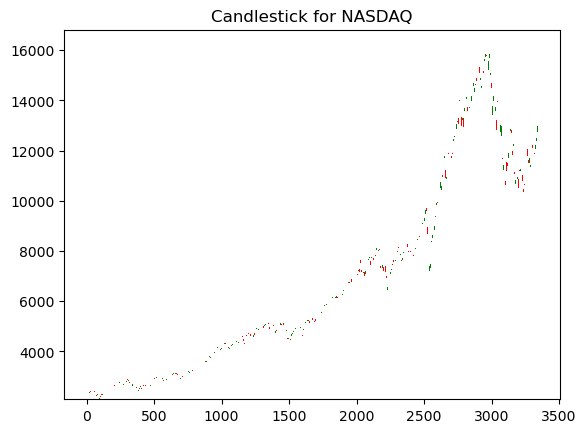

In [71]:
plt.title('Candlestick for NASDAQ')

for i in range(len(r3)):
    if(r4.iloc[i]>r3.iloc[i]):
        plt.bar(x=i,height=(r4.iloc[i]-r3.iloc[i]),bottom=r3.iloc[i],color='r')
    if(r3.iloc[i]>r4.iloc[i]):
        plt.bar(x=i,height=(r3.iloc[i]-r4.iloc[i]),bottom=r4.iloc[i],color='g')

In [74]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=NASDAQ['Date'],
                open=NASDAQ['Open'],
                high=NASDAQ['High'],
                low=NASDAQ['Low'],
                close=NASDAQ['Close'])])

fig.show()

In [75]:
#Bollinger Bands
NASDAQ['SMA']={}
for i in range(19,len(NASDAQ.Close)):
    sum=0
    for j in range(i-19,i+1):
        sum+=NASDAQ.Close[j]
    mean=sum/20
    NASDAQ['SMA'][i]=mean
NASDAQ['SD']={}
for i in range(19,len(NASDAQ.Close)-1):
    SD=NASDAQ.Close.iloc[i-19:i+1].std()
    NASDAQ['SD'][i]=SD
NASDAQ['SD'][len(NASDAQ.Close)-1]=NASDAQ.Close.tail(20).std()
NASDAQ


C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\1476641061.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\1476641061.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\1476641061.py:9: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\1476641061.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,MACD_EMA_9,SMA,SD
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,,,,,NaN,NaN
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,,,,,NaN,NaN
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,,,,,NaN,NaN
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,,,,,NaN,NaN
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,2023-05-22,12664.440430,12756.230469,12655.259766,12720.780273,12720.780273,4278920000,12441.303588,12273.174795,168.128793,122.710253,12258.754541,252.622989
3369,2023-05-23,12652.879883,12709.740234,12554.429688,12560.250000,12560.250000,4347440000,12459.603036,12294.439625,165.163411,131.200884,12296.809033,236.560745
3370,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,12463.381054,12308.492998,154.888057,135.938319,12328.299561,215.547744
3371,2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12499.490099,12337.352023,162.138076,141.17827,12356.092041,225.882377


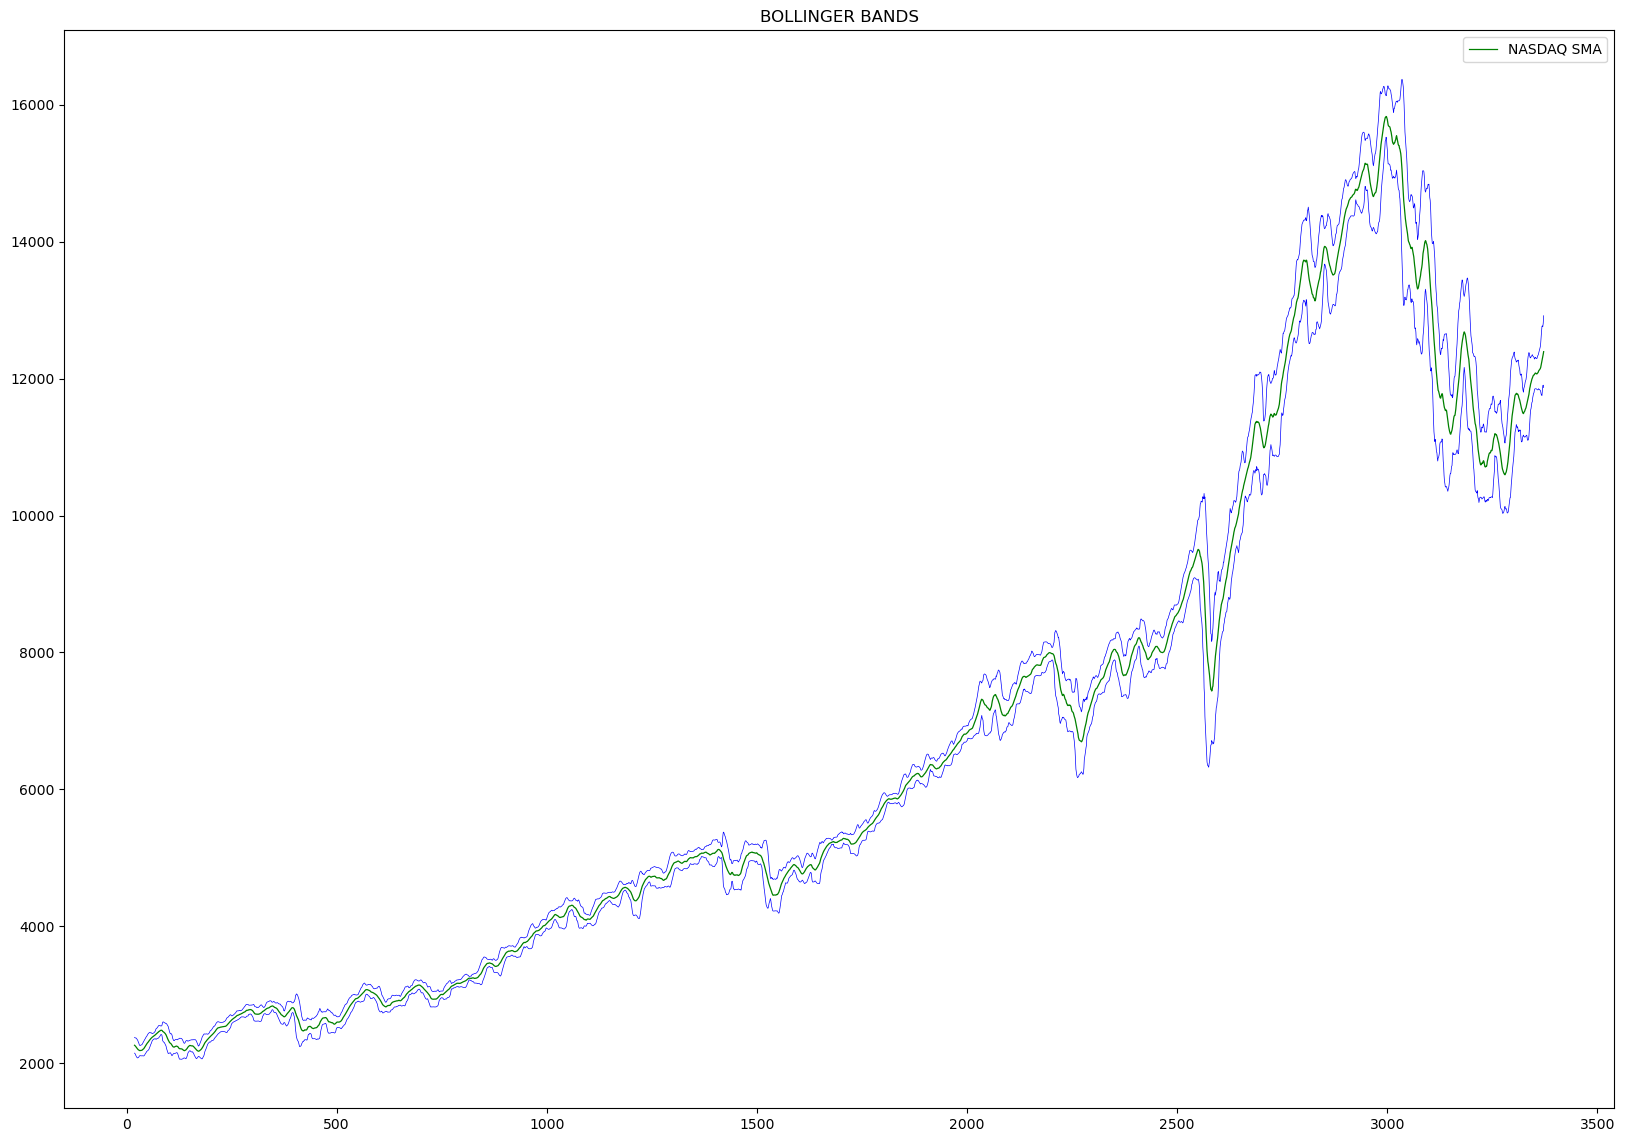

In [76]:
#BOLLINGER BANDS PLOT
plt.figure(figsize=(20,14))
plt.plot(NASDAQ['SMA'],color='g',linewidth= 0.9,label="NASDAQ SMA")
plt.plot(NASDAQ['SMA']+2*NASDAQ['SD'],linewidth= 0.5,color='b')
plt.plot(NASDAQ['SMA']-2*NASDAQ['SD'],linewidth= 0.5,color='b')
plt.title('BOLLINGER BANDS')
plt.legend(loc='best')

In [77]:
#CODE KELTNER CHANNEL
#EMA_20, EMA_20+2*ATR,EMA_20-2*ATR
#current high less the current low; 
#the absolute value of the current high less the previous close;
#and the absolute value of the current low less the previous close.

def ATR(indices):
    indices['ATR']={}
    for i in range(19,len(indices.Close)):
        first=indices.High[i]-indices.Low[i]
        second=indices.High[i]-indices.Close[i-1]
        third=indices.Low[i]-indices.Close[i-1]
        if(first<0):
            first=-first
        if(second<0):
            second=-second
        if(third<0):
            third=-third
        indices['ATR'][i]=max(first,second,third)
    return indices
NASDAQ=ATR(NASDAQ)
NASDAQ

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\2309142774.py:8: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\2309142774.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,MACD_EMA_9,SMA,SD,ATR
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,,,,,NaN,NaN,NaN
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,,,,,NaN,NaN,NaN
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,,,,,NaN,NaN,NaN
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,,,,,NaN,NaN,NaN
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,,,,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,2023-05-22,12664.440430,12756.230469,12655.259766,12720.780273,12720.780273,4278920000,12441.303588,12273.174795,168.128793,122.710253,12258.754541,252.622989,100.970703
3369,2023-05-23,12652.879883,12709.740234,12554.429688,12560.250000,12560.250000,4347440000,12459.603036,12294.439625,165.163411,131.200884,12296.809033,236.560745,166.350585
3370,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,12463.381054,12308.492998,154.888057,135.938319,12328.299561,215.547744,144.400391
3371,2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12499.490099,12337.352023,162.138076,141.17827,12356.092041,225.882377,252.759766


In [78]:
NASDAQ=EMA(NASDAQ,20)
NASDAQ.rename(columns={'EMA':'EMA_20'},inplace=True)
NASDAQ

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\731745213.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gupil\AppData\Local\Temp\ipykernel_29132\731745213.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,MACD_EMA_9,SMA,SD,ATR,EMA_20
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,,,,,NaN,NaN,NaN,
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,,,,,NaN,NaN,NaN,
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,,,,,NaN,NaN,NaN,
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,,,,,NaN,NaN,NaN,
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,,,,,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,2023-05-22,12664.440430,12756.230469,12655.259766,12720.780273,12720.780273,4278920000,12441.303588,12273.174795,168.128793,122.710253,12258.754541,252.622989,100.970703,12333.894979
3369,2023-05-23,12652.879883,12709.740234,12554.429688,12560.250000,12560.250000,4347440000,12459.603036,12294.439625,165.163411,131.200884,12296.809033,236.560745,166.350585,12355.4526
3370,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,12463.381054,12308.492998,154.888057,135.938319,12328.299561,215.547744,144.400391,12367.710463
3371,2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12499.490099,12337.352023,162.138076,141.17827,12356.092041,225.882377,252.759766,12399.175166


TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

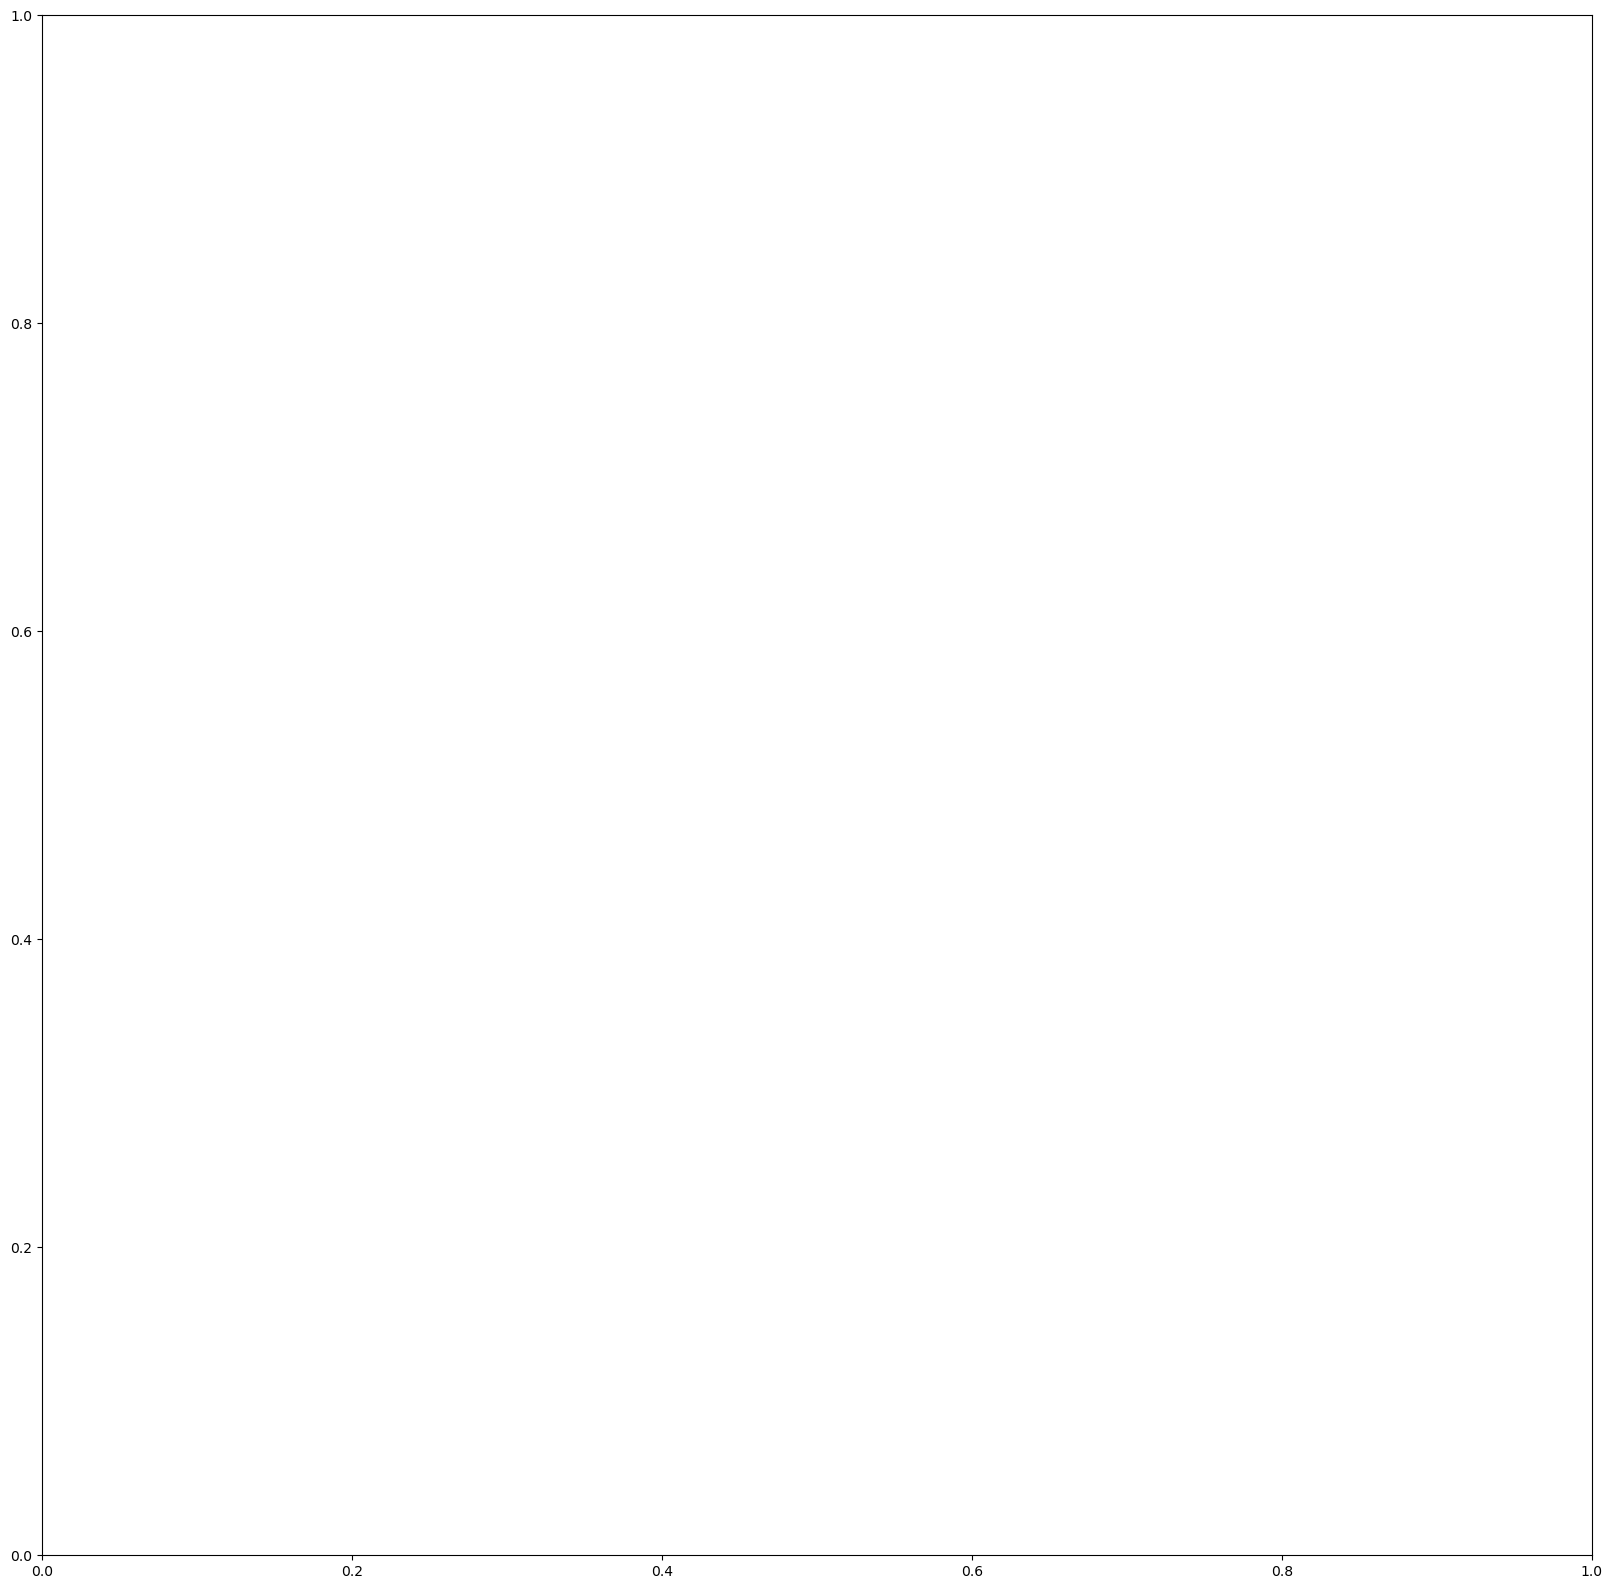

In [79]:
plt.figure(figsize=(20,20))
plt.plot(NASDAQ['EMA_20'].tail(3355),linewidth=0.5,color='b')
plt.plot(NASDAQ.EMA_20.tail(3355)+2*NASDAQ.ATR.tail(3355),linewidth=0.5,alpha=0.3,color='r')
plt.plot(NASDAQ.EMA_20.tail(3355)-2*NASDAQ.ATR.tail(3355),alpha=0.3,linewidth=0.5,color='r')
plt.title("KELTNER CHANNEL")

In [25]:
#OK SO LETS APPLY NASDAQ index indicators on NSE, it should be approximately same as NSE and NASDAQ are highly correlated.
#I will modify the indexes to only include 2 year data using google stock

In [28]:
google=pd.read_csv('~\Downloads\GOOG (3).csv')
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-07,122.566002,123.400002,122.053650,123.304497,123.304497,23850000
1,2021-06-08,123.995003,124.724747,123.412003,124.142502,124.142502,25060000
2,2021-06-09,124.974998,125.250000,124.366501,124.570000,124.570000,20126000
3,2021-06-10,124.700500,126.163002,124.699997,126.080002,126.080002,31234000
4,2021-06-11,126.246002,126.349503,124.914497,125.696503,125.696503,25240000
...,...,...,...,...,...,...,...
499,2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
500,2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
501,2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400
502,2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500


In [34]:
count=0
sample=pd.DataFrame(columns=['Date','Open','High','Low','Close','Adj Close','Volume'])
tool=pd.DataFrame(columns=['Date','Open','High','Low','Close','Adj Close','Volume','EMA_12','EMA_26','MACD','MACD_EMA_9','SMA','SD','ATR','EMA_20'])
for i in range(len(google.Date)):
    for j in range(len(NASDAQ.Close)):
        if(google.Date[i]==NASDAQ.Date[j]):
            sample.loc[count]=google.loc[i]
            tool.loc[count]=NASDAQ.loc[j]
            count+=1
            break
tool
        

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,MACD_EMA_9,SMA,SD,ATR,EMA_20
0,2021-06-07,13802.820313,13889.110352,13784.889648,13881.719727,13881.719727,4639210000,13699.109333,13652.594405,46.514928,6.733123,13535.599561,236.32668,104.220704,13663.709824
1,2021-06-08,13946.320313,13981.719727,13831.980469,13924.910156,13924.910156,5958410000,13733.847921,13672.765942,61.081979,17.602894,13561.752051,249.331021,149.739258,13688.586046
2,2021-06-09,13980.230469,14003.5,13906.450195,13911.75,13911.75,5640490000,13761.217472,13690.468465,70.749007,28.232117,13587.868066,257.550796,97.049805,13709.839756
3,2021-06-10,13933.879883,14031.19043,13904.400391,14020.330078,14020.330078,4919880000,13801.08095,13714.902658,86.178291,39.821352,13637.300586,239.420599,126.790039,13739.410263
4,2021-06-11,14030.849609,14069.419922,14006.589844,14069.419922,14069.419922,4157580000,13842.363868,13741.163196,101.200672,52.097216,13684.52207,225.807335,62.830078,13770.839754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2023-05-23,12652.879883,12709.740234,12554.429688,12560.25,12560.25,4347440000,12459.603036,12294.439625,165.163411,131.200884,12296.809033,236.560745,166.350585,12355.4526
495,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,359790000,12463.381054,12308.492998,154.888057,135.938319,12328.299561,215.547744,144.400391,12367.710463
496,2023-05-25,12706.44043,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12499.490099,12337.352023,162.138076,141.17827,12356.092041,225.882377,252.759766,12399.175166
497,2023-05-26,12736.419922,13001.910156,12729.740234,12975.69043,12975.69043,4434070000,12572.751688,12384.63635,188.115339,150.565684,12393.547559,262.428398,303.820312,12454.081381


In [49]:

#OK so lets apply NASDAQ index bands upon NASDAQ in the given time frame to give us interpretation
#1. MACD
#Also all profit and loss calculation has been done on with max profit. Buying at lowest price and selling at highest price.
buy_dates=[]
buying_price=[]
sell_dates=[]
selling_price=[]
for i in range(len(tool.Date)-1):
    if(tool.MACD[i] and tool.MACD[i+1]>0):
        buy_dates.append(tool.Date[i+1])
        buying_price.append(tool.Low[i+1])
    if(tool.MACD[i]>0 and tool.MACD[i+1]<0):
        sell_dates.append(tool.Date[i+1])
        selling_price.append(tool.High[i+1])
MACD_analysis=pd.DataFrame(list((zip(buy_dates,buying_price,sell_dates,selling_price))),columns=['buy_dates','buying_price','sell_dates','selling_price'])
MACD_analysis['OUTCOME']={}
for i in range(len(MACD_analysis.buy_dates)):
    MACD_analysis['OUTCOME'][i]=MACD_analysis['selling_price'][i]-MACD_analysis['buying_price'][i]
MACD_analysis

C:\Users\tanus\AppData\Local\Temp\ipykernel_4488\2542998008.py:16: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\tanus\AppData\Local\Temp\ipykernel_4488\2542998008.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,buy_dates,buying_price,sell_dates,selling_price,OUTCOME
0,2021-06-08,13831.980469,2021-09-28,14817.740234,985.759765
1,2021-06-09,13906.450195,2021-12-03,15470.360352,1563.910157
2,2021-06-10,13904.400391,2021-12-09,15796.049805,1891.649414
3,2021-06-11,14006.589844,2021-12-13,15637.059570,1630.469726
4,2021-06-14,14056.669922,2022-01-06,15198.450195,1141.780273
5,2021-06-15,14052.160156,2022-04-12,13685.950195,-366.209961
6,2021-06-16,13903.730469,2022-08-31,12027.429688,-1876.300781
7,2021-06-17,13998.929688,2022-12-16,10833.240234,-3165.689454
8,2021-06-18,14009.040039,2023-03-09,11667.120117,-2341.919922


In [37]:
#MACD net profit
print((MACD_analysis['OUTCOME']).sum())

3812.7490210000014


In [56]:
#BOLLINGER BAND strategy
buy_dates=[]
buying_price=[]
sell_dates=[]
selling_price=[]
for i in range(len(tool.Date)-1):
    if(tool.Low[i+1]<(tool['SMA'][i+1]-2*tool['SD'][i+1]) and tool.Low[i]>(tool['SMA'][i]-2*tool['SD'][i])):
        sell_dates.append(tool.Date[i+1])
        selling_price.append(tool.Low[i+1])
    if(tool.High[i+1]>(tool['SMA'][i+1]+2*tool['SD'][i+1]) and tool.High[i]<(tool['SMA'][i]+2*tool['SD'][i])):
        buy_dates.append(tool.Date[i+1])
        buying_price.append(tool.High[i+1])
BOLLINGER_BANDS_analysis=pd.DataFrame(list((zip(buy_dates,buying_price,sell_dates,selling_price))),columns=['buy_dates','buying_price','sell_dates','selling_price'])
BOLLINGER_BANDS_analysis['OUTCOME']={}
for i in range(len(BOLLINGER_BANDS_analysis.buy_dates)):
    BOLLINGER_BANDS_analysis['OUTCOME'][i]=BOLLINGER_BANDS_analysis['selling_price'][i]-BOLLINGER_BANDS_analysis['buying_price'][i]
BOLLINGER_BANDS_analysis

C:\Users\tanus\AppData\Local\Temp\ipykernel_4488\3994590798.py:14: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\tanus\AppData\Local\Temp\ipykernel_4488\3994590798.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,buy_dates,buying_price,sell_dates,selling_price,OUTCOME
0,2021-06-24,14414.459961,2021-08-17,14550.879883,136.419922
1,2021-08-24,15034.889648,2021-09-20,14530.070313,-504.819335
2,2021-08-27,15144.480469,2021-09-28,14539.879883,-604.600586
3,2022-07-20,11939.959961,2021-10-01,14324.009766,2384.049805
4,2022-07-29,12426.259766,2021-11-26,15456.089844,3029.830078
5,2022-08-03,12699.639648,2021-11-30,15451.389648,2751.750000
6,2022-11-11,11352.429688,2021-12-17,14960.370117,3607.940429
7,2022-11-15,11492.620117,2022-01-06,14914.870117,3422.250000
8,2022-12-13,11571.639648,2022-01-10,14530.230469,2958.590821
9,2023-01-13,11084.009766,2022-01-18,14482.940430,3398.930664


In [51]:
tool

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,MACD_EMA_9,SMA,SD,ATR,EMA_20,Daily Return
0,2021-06-07,13802.820313,13889.110352,13784.889648,13881.719727,13881.719727,4639210000,13699.109333,13652.594405,46.514928,6.733123,13535.599561,236.32668,104.220704,13663.709824,78.899414
1,2021-06-08,13946.320313,13981.719727,13831.980469,13924.910156,13924.910156,5958410000,13733.847921,13672.765942,61.081979,17.602894,13561.752051,249.331021,149.739258,13688.586046,-21.410157
2,2021-06-09,13980.230469,14003.5,13906.450195,13911.75,13911.75,5640490000,13761.217472,13690.468465,70.749007,28.232117,13587.868066,257.550796,97.049805,13709.839756,-68.480469
3,2021-06-10,13933.879883,14031.19043,13904.400391,14020.330078,14020.330078,4919880000,13801.08095,13714.902658,86.178291,39.821352,13637.300586,239.420599,126.790039,13739.410263,86.450195
4,2021-06-11,14030.849609,14069.419922,14006.589844,14069.419922,14069.419922,4157580000,13842.363868,13741.163196,101.200672,52.097216,13684.52207,225.807335,62.830078,13770.839754,38.570313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2023-05-23,12652.879883,12709.740234,12554.429688,12560.25,12560.25,4347440000,12459.603036,12294.439625,165.163411,131.200884,12296.809033,236.560745,166.350585,12355.4526,-92.629883
495,2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,359790000,12463.381054,12308.492998,154.888057,135.938319,12328.299561,215.547744,144.400391,12367.710463,2.270508
496,2023-05-25,12706.44043,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12499.490099,12337.352023,162.138076,141.17827,12356.092041,225.882377,252.759766,12399.175166,-8.350586
497,2023-05-26,12736.419922,13001.910156,12729.740234,12975.69043,12975.69043,4434070000,12572.751688,12384.63635,188.115339,150.565684,12393.547559,262.428398,303.820312,12454.081381,239.270508


In [68]:
def SharpeRatio(stock,rf,N):
    a=stock['Daily Return'].mean()
    b=stock['Daily Return'].std()
    c=N**0.5
    d=(a*N)-(rf/100)
    e=b*c
    return d/e

tool['Daily Return']=tool.Close-tool.Open
tool

def maxDrawdown(asset):
    peak = asset.Close[0]
    drawdown = 0.0 
    
    for price in asset.Close:
        if price > peak:
            peak = price
        else: 
            curr_drawdown = ( peak-price)
            if curr_drawdown > drawdown:
                drawdown = curr_drawdown
    mdd = drawdown
    
    return mdd



In [64]:
print("sharpe ratio: ",SharpeRatio(tool,5,252))


sharpe ratio:  0.09093991899086654


In [69]:
print("max drawdown: ",maxDrawdown(tool))

max drawdown:  5844.150391000001
